# Publications Per Professor

This experiment aims to analyze publication trends among Machine Learning professors by generating individualized bar plots for each academic, thereby offering a personalized signal indicative of the respective professor's scholarly output. 


In [1]:
import os
import json
import imageio
import numpy as np
import pandas as pd
from tqdm import tqdm
from tueplots import bundles
import matplotlib.pyplot as plt
from IPython.display import Image
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 300})

In [6]:
df = pd.read_csv("./../dat/Publications.csv")

df = df.drop_duplicates(subset=['Professor', 'Title'], keep='first')

years = range(df['Year'].min(), df['Year'].max() + 1)
professors = df["Professor"].unique()
publication_types = df["Publication Type"].unique()

for professor in tqdm(professors, desc="Creating Plot for Each Professor"):
    professor_df = df[df['Professor'] == professor]
    professor_pivot_table = professor_df.pivot_table(index='Year', columns='Publication Type', aggfunc='size', fill_value=0)
    professor_pivot_table = professor_pivot_table.reindex(columns=professor_pivot_table.columns.union(publication_types), fill_value=0)
    professor_pivot_table = professor_pivot_table.reindex(years, fill_value=0)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig.get_size_inches()[0], 2)

    # Bar plot
    ax.bar(years, professor_pivot_table["Informal or Other Publication"], color=rgb.tue_gray, alpha=1, label="Informal and Other Publications")
    ax.bar(years, professor_pivot_table["Conference or Workshop Paper"], bottom=professor_pivot_table["Informal or Other Publication"], color=rgb.tue_darkblue, alpha=1, label="Conference and Workshop Papers")
    ax.bar(years, professor_pivot_table["Journal Article"], bottom=professor_pivot_table["Informal or Other Publication"] + professor_pivot_table["Conference or Workshop Paper"], color=rgb.tue_red, alpha=1, label="Journal Articles")
    
    ax.set_ylim([0, 80])
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)
    
    ax.set_xlim([years[0] - 0.5, years[-1] + 1])
    ax.set_xticks(years)
    ax.tick_params(axis='x', rotation=90)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Publications')
    ax.set_title(f'Publications by Prof. {professor}')
    ax.legend(loc="upper left", framealpha=1, facecolor="white", frameon=True)
    
    plt.close()
    
    fig.savefig(f'./../dat/plots/PublicationsPerProfessor/{professor}.png')

Creating Plot for Each Professor: 100%|████████████████████████████████████████████████| 27/27 [00:25<00:00,  1.06it/s]


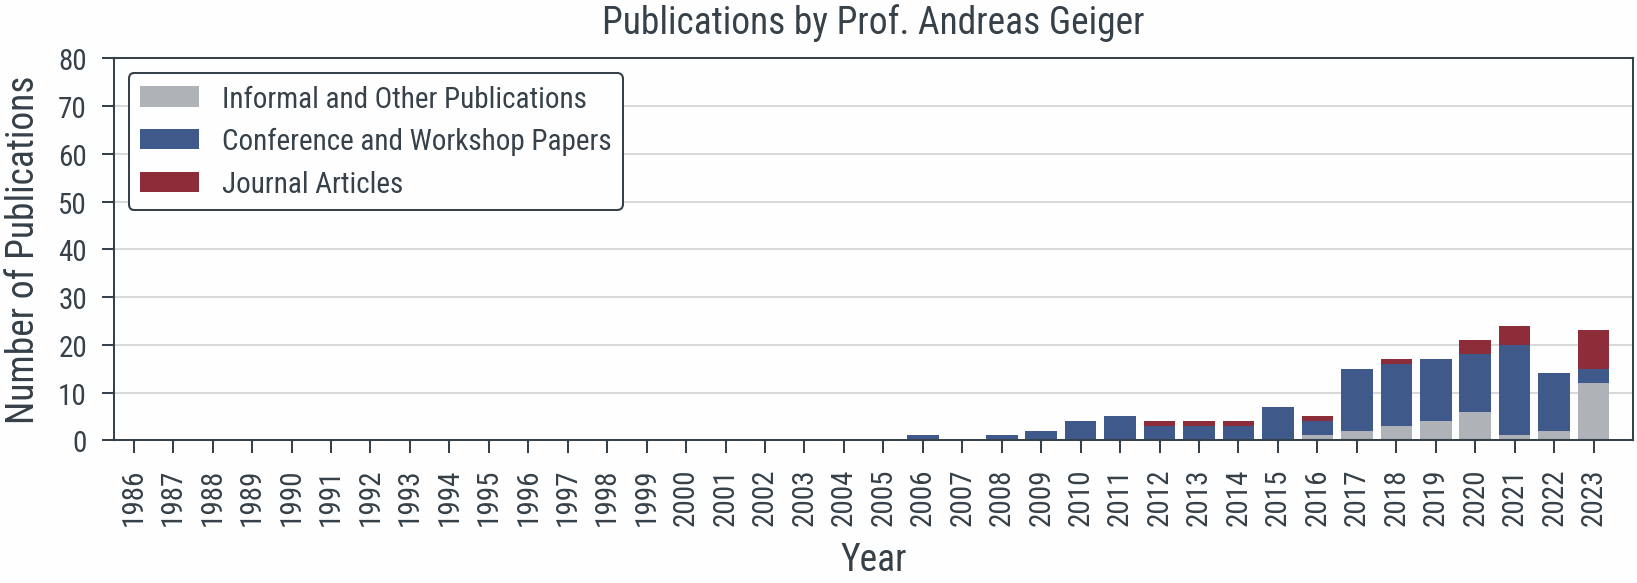

In [7]:
png_dir = './../dat/plots/PublicationsPerProfessor/'
png_files = [f for f in os.listdir(png_dir) if f.endswith('.png')]

frames = []
for png_file in png_files:
    frames.append(imageio.v2.imread(os.path.join(png_dir, png_file)))

imageio.mimsave('./../dat/plots/PublicationsPerProfessor/PublicationsPerProfessor.gif', frames, fps=1, loop=0)

Image(filename='./../dat/plots/PublicationsPerProfessor/PublicationsPerProfessor.gif')